In [19]:
import numpy
import random
import itertools
import pickle
import matplotlib.pyplot as plt

In [20]:
#### parameters
num_trials = 3
num_categories = 388
num_categories_transformed = [1, 50, 100, 150, 200, 250, 300, 350, 388]

params1 = [1, 50, 100, 150, 200, 250, 300, 350, 388] # number of transformed categories
params2 = ['blur', 'scale', 'quantization'] # transformation types
params_comb = [p for p in itertools.product(params1, params2)]


/var/folders/_1/4xb13lhx0nx3zt45yhd8qf740000gn/T/ipykernel_5006/625571043.py:24: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(wspace=margin, hspace=margin)


(0.0, 1.0)

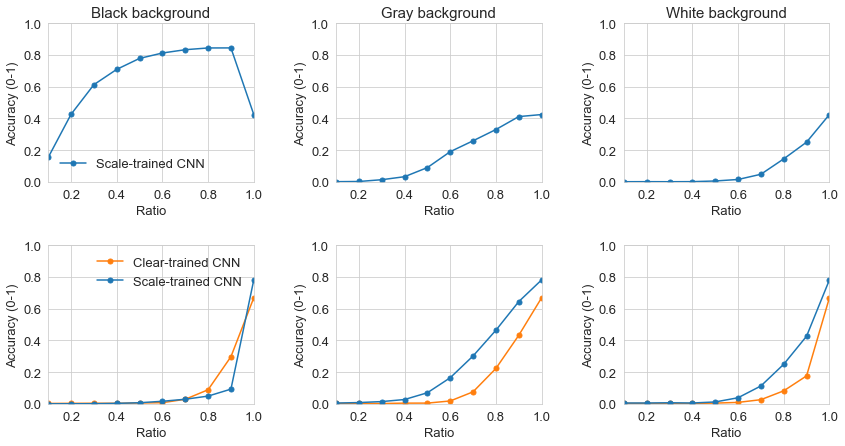

In [21]:
plt.figure(figsize=(14,7))
plt.rcParams['font.size'] = '13'
margin = 0.4

#### accuracy by scale & background
ids = [0,14] # blur, scale, quantization
params = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.] # scale
params2 = [0., 0.5, 1.] # background color
acc_within = numpy.zeros((len(params), len(params2), len(ids), num_trials))
acc_across = numpy.zeros((len(params), len(params2), len(ids), num_trials))
for i, id in enumerate(ids):
    for t in range(num_trials):
        random.seed(t+1) # seed fixed
        category_orders = [i for i in range(num_categories)]
        random.shuffle(category_orders)

        with open('/Users/hojinjang/Desktop/DeepLearning/RobustFaceRecog/results/v1/id{}_t{}/analysis_v1_accuracy_by_scale_background.pickle'.format(id, t+1), 'rb') as f:
            data = pickle.load(f)
        acc_within[:,:,i,t] = data['accuracy1_within']
        acc_across[:,:,i,t] = data['accuracy1_across']

#### visualize - within
plt.subplot(2,3, 1)
plt.subplots_adjust(wspace=margin, hspace=margin)
q = acc_within[:,0,:,:]
plt.plot(params, numpy.mean(acc_within[:,0,1,:], axis=1), '.-', color='tab:blue', markersize=10)
plt.xlabel('Ratio')
plt.ylabel('Accuracy (0-1)')
plt.xlim([0.1,1.])
plt.ylim(0,1)
plt.title('Black background', fontdict = {'fontsize':15})
plt.legend(['Scale-trained CNN'], frameon=False)

plt.subplot(2,3, 2)
plt.subplots_adjust(wspace=margin, hspace=margin)
plt.plot(params, numpy.mean(acc_within[:,1,1,:], axis=1), '.-', color='tab:blue', markersize=10)
plt.xlabel('Ratio')
plt.ylabel('Accuracy (0-1)')
plt.xlim([0.1,1.])
plt.ylim(0,1)
plt.title('Gray background', fontdict = {'fontsize':15})

plt.subplot(2,3, 3)
plt.subplots_adjust(wspace=margin, hspace=margin)
plt.plot(params, numpy.mean(acc_within[:,2,1,:], axis=1), '.-', color='tab:blue', markersize=10)
plt.xlabel('Ratio')
plt.ylabel('Accuracy (0-1)')
plt.xlim([0.1,1.])
plt.ylim(0,1)
plt.title('White background', fontdict = {'fontsize':15})

#### visualize - across
plt.subplot(2,3, 4)
plt.subplots_adjust(wspace=margin, hspace=margin)
q = acc_within[:,0,:,:]
plt.plot(params, numpy.mean(acc_across[:,0,0,:], axis=1), '.-', color='tab:orange', markersize=10)
plt.plot(params, numpy.mean(acc_across[:,0,1,:], axis=1), '.-', color='tab:blue', markersize=10)
plt.xlabel('Ratio')
plt.ylabel('Accuracy (0-1)')
plt.xlim([0.1,1.])
plt.ylim(0,1)
plt.legend(['Clear-trained CNN', 'Scale-trained CNN'], frameon=False)

plt.subplot(2,3, 5)
plt.subplots_adjust(wspace=margin, hspace=margin)
plt.plot(params, numpy.mean(acc_across[:,1,0,:], axis=1), '.-', color='tab:orange', markersize=10)
plt.plot(params, numpy.mean(acc_across[:,1,1,:], axis=1), '.-', color='tab:blue', markersize=10)
plt.xlabel('Ratio')
plt.ylabel('Accuracy (0-1)')
plt.xlim([0.1,1.])
plt.ylim(0,1)

plt.subplot(2,3, 6)
plt.subplots_adjust(wspace=margin, hspace=margin)
plt.plot(params, numpy.mean(acc_across[:,2,0,:], axis=1), '.-', color='tab:orange', markersize=10)
plt.plot(params, numpy.mean(acc_across[:,2,1,:], axis=1), '.-', color='tab:blue', markersize=10)
plt.xlabel('Ratio')
plt.ylabel('Accuracy (0-1)')
plt.xlim([0.1,1.])
plt.ylim(0,1)